In [3]:
from pathlib import Path

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz, process

def make_choropleths(df, country_col, col1, col2, shapefile_path):
    # Load shapefile
    world = gpd.read_file(shapefile_path)
    shapefile_countries = world['ADMIN'].unique()

    # Match country names
    def match_country(name):
        match = process.extractOne(name, shapefile_countries, scorer=fuzz.partial_ratio)
        if match and match[1] > 80:
            return match[0]
        return None

    df = df.copy()
    df['Mapped Country'] = df[country_col].apply(match_country)

    # Merge
    merged = world.merge(df, how="left", left_on="ADMIN", right_on="Mapped Country")

    # Plotting
    sns.set_theme(style="whitegrid")
    plt.rcParams['font.family'] = 'Georgia'
    plt.rcParams['axes.facecolor'] = '#f5f5f5'

    fig, ax = plt.subplots(1, 2, figsize=(20, 12))

    for i, column in enumerate([col1, col2]):
        merged.boundary.plot(ax=ax[i], linewidth=0.8, color='black')
        merged.plot(
            column=column,
            ax=ax[i],
            legend=True,
            legend_kwds={'label': column, 'orientation': "horizontal"},
            cmap='YlGnBu' if i else 'YlOrRd',
            missing_kwds={"color": "lightgrey", "label": "No data"}
        )
        ax[i].set_title(f"{column} by Country", fontsize=18, fontweight='bold')
        ax[i].axis('off')

    plt.tight_layout()
    plt.show()

c:\Users\ryant\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
shapefile_path = "data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"


In [5]:
merged_path = Path('data') / 'final_merged_df.csv'
merged_df = pd.read_csv(merged_path)
merged_df.head()

,Unnamed: 0,Average Sleep Quality (0-1),Average Sleep Duration (Hours),Average Snore Duration (Minutes),SES,gdppc,PM2.5 (?g/m3),PM10 (?g/m3),NO2 (?g/m3)
0,Canada,0.770628,7.56,44.31,93.772118,40699.3550,7.00,NaN,11.0
1,Colombia,0.729727,7.12,23.96,59.636009,10900.5040,10.49,NaN,NaN
2,India,0.706097,6.97,35.62,22.542639,4404.5376,45.00,74.0,25.0
3,Israel,0.740612,7.23,34.20,86.517677,29599.7930,NaN,63.5,NaN
4,Sweden,0.786576,7.69,51.94,91.959633,42942.5630,NaN,NaN,1.2


In [9]:
merged_df = merged_df.rename(columns={'Unnamed: 0' : 'Country'})
merged_df

,Country,Average Sleep Quality (0-1),Average Sleep Duration (Hours),Average Snore Duration (Minutes),SES,gdppc,PM2.5 (?g/m3),PM10 (?g/m3),NO2 (?g/m3)
0,Canada,0.770628,7.56,44.31,93.772118,40699.3550,7.00,NaN,11.00
1,Colombia,0.729727,7.12,23.96,59.636009,10900.5040,10.49,NaN,NaN
2,India,0.706097,6.97,35.62,22.542639,4404.5376,45.00,74.00,25.00
3,Israel,0.740612,7.23,34.20,86.517677,29599.7930,NaN,63.50,NaN
4,Sweden,0.786576,7.69,51.94,91.959633,42942.5630,NaN,NaN,1.20
5,Spain,0.746307,7.46,43.95,85.359718,32506.4340,13.60,26.91,18.34
6,Denmark,0.780589,7.65,51.91,88.418976,43757.7380,9.56,NaN,10.23
7,Greece,0.729426,7.57,50.57,85.653824,28726.0800,NaN,NaN,21.07
8,Slovakia,0.766138,7.50,47.71,86.117645,25159.0780,13.92,21.06,19.09
9,Estonia,0.787921,7.67,41.12,87.317307,22740.9650,4.01,11.02,4.71


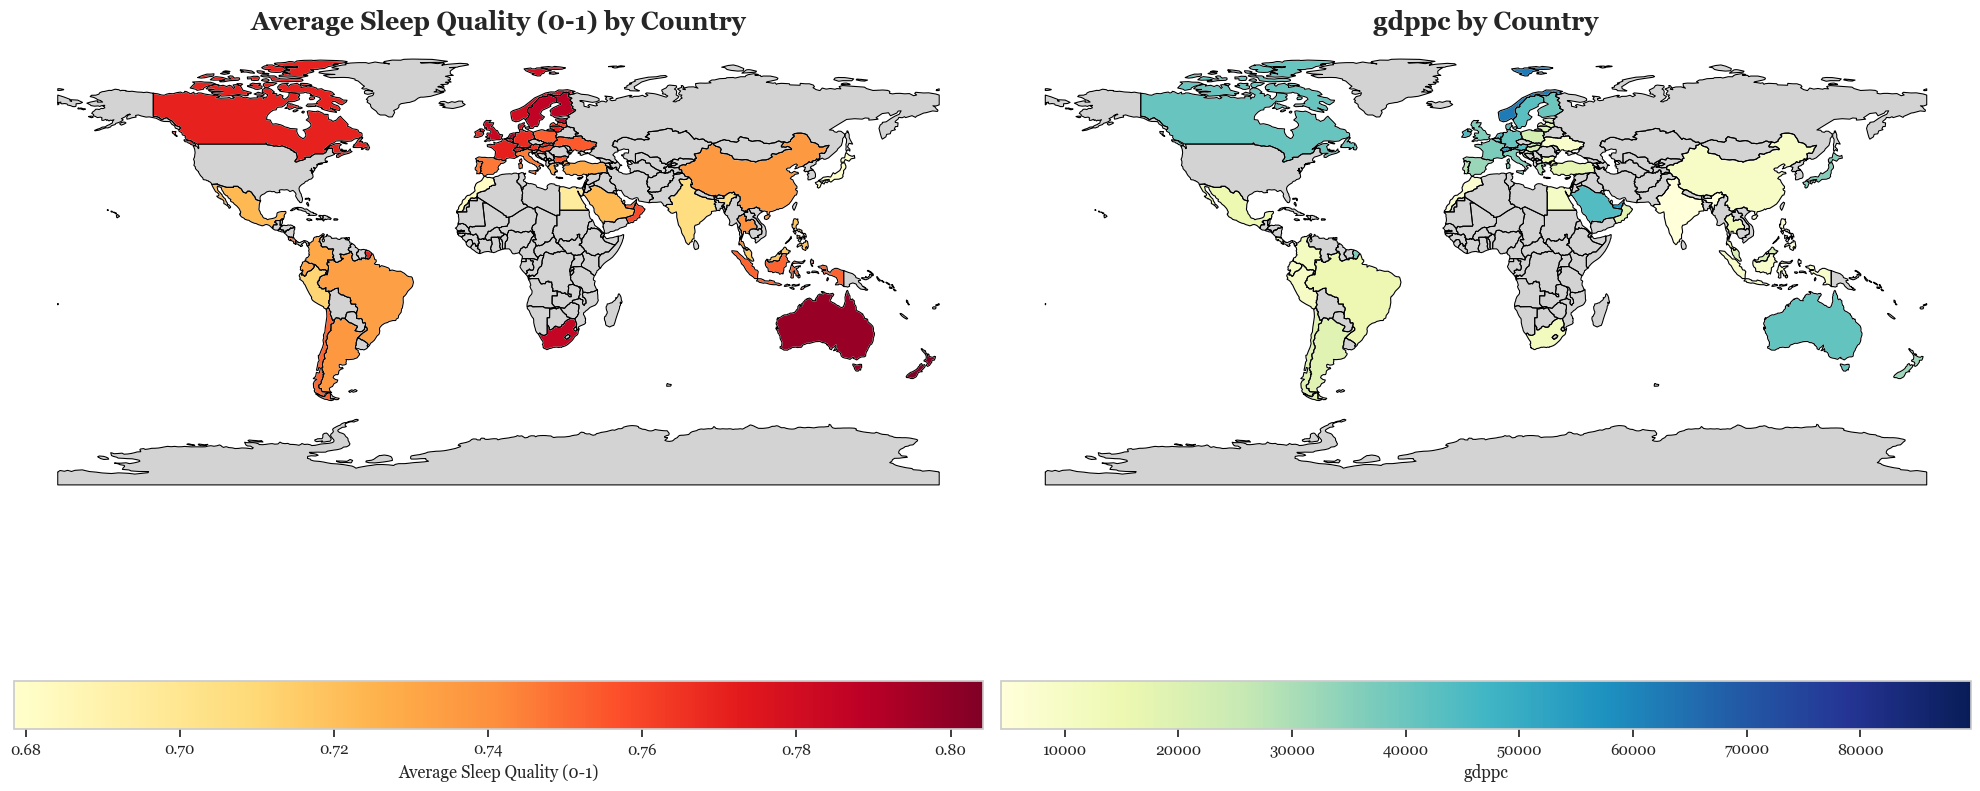

In [8]:
make_choropleths(merged_df, 'Country', 'Average Sleep Quality (0-1)', 'gdppc', shapefile_path)